# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [64]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [01:01<00:00, 976File/s]  


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

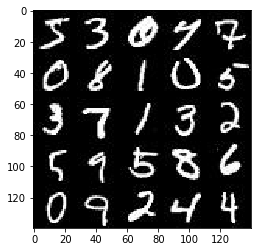

In [65]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

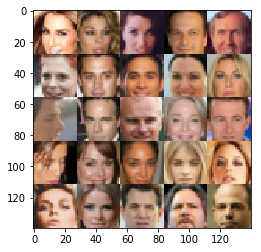

In [66]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [67]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/Dietrich/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [73]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, 
                                 (None, image_width, image_height, image_channels),
                                'inputs_real')
    inputs_z = tf.placeholder(tf.float32, 
                              (None, z_dim), 
                              'inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [32]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):

        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [31]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [34]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real, 
            labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, 
            labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, 
            labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [76]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_updates = [item for item in update_ops if opt.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, 
            beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [77]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    losses = []
    n_images = 25
    
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                batch_images = batch_images * 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={real_input: batch_images, 
                                               z_input: z_sample, 
                                               lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={z_input: z_sample, 
                                               lr: learning_rate})
                
                steps += 1
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3983... Generator Loss: 15.9021
Epoch 1/2... Discriminator Loss: 0.0335... Generator Loss: 14.2203
Epoch 1/2... Discriminator Loss: 0.7698... Generator Loss: 7.9545
Epoch 1/2... Discriminator Loss: 1.4827... Generator Loss: 6.1563
Epoch 1/2... Discriminator Loss: 1.0375... Generator Loss: 0.9289
Epoch 1/2... Discriminator Loss: 0.0086... Generator Loss: 7.1150
Epoch 1/2... Discriminator Loss: 0.1866... Generator Loss: 2.7009
Epoch 1/2... Discriminator Loss: 0.6055... Generator Loss: 7.2390
Epoch 1/2... Discriminator Loss: 0.1066... Generator Loss: 3.2638
Epoch 1/2... Discriminator Loss: 0.6225... Generator Loss: 1.4893


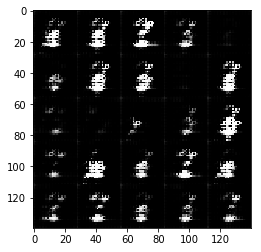

Epoch 1/2... Discriminator Loss: 0.5419... Generator Loss: 3.9037
Epoch 1/2... Discriminator Loss: 0.8326... Generator Loss: 1.1155
Epoch 1/2... Discriminator Loss: 2.1111... Generator Loss: 5.4269
Epoch 1/2... Discriminator Loss: 0.6315... Generator Loss: 1.2945
Epoch 1/2... Discriminator Loss: 0.9920... Generator Loss: 1.3782
Epoch 1/2... Discriminator Loss: 0.2882... Generator Loss: 2.3031
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 5.2859
Epoch 1/2... Discriminator Loss: 0.7449... Generator Loss: 1.1580
Epoch 1/2... Discriminator Loss: 0.5363... Generator Loss: 1.8999
Epoch 1/2... Discriminator Loss: 0.3312... Generator Loss: 1.7215


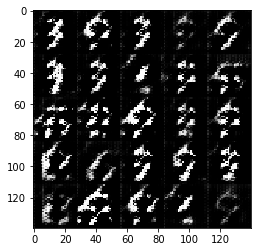

Epoch 1/2... Discriminator Loss: 0.6311... Generator Loss: 3.1783
Epoch 1/2... Discriminator Loss: 1.4113... Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 0.4491... Generator Loss: 1.8368
Epoch 1/2... Discriminator Loss: 0.3141... Generator Loss: 4.1444
Epoch 1/2... Discriminator Loss: 0.9661... Generator Loss: 1.4890
Epoch 1/2... Discriminator Loss: 0.4517... Generator Loss: 2.4230
Epoch 1/2... Discriminator Loss: 1.4198... Generator Loss: 6.2591
Epoch 1/2... Discriminator Loss: 2.1615... Generator Loss: 4.3509
Epoch 1/2... Discriminator Loss: 0.8939... Generator Loss: 0.9022
Epoch 1/2... Discriminator Loss: 0.7646... Generator Loss: 1.3064


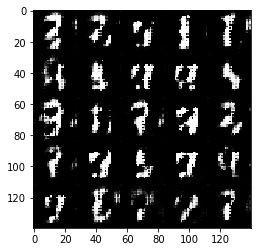

Epoch 1/2... Discriminator Loss: 0.5368... Generator Loss: 1.9103
Epoch 1/2... Discriminator Loss: 0.5438... Generator Loss: 2.5036
Epoch 1/2... Discriminator Loss: 0.3020... Generator Loss: 2.0703
Epoch 1/2... Discriminator Loss: 0.6376... Generator Loss: 2.1734
Epoch 1/2... Discriminator Loss: 0.7917... Generator Loss: 1.9416
Epoch 1/2... Discriminator Loss: 0.5168... Generator Loss: 1.6158
Epoch 1/2... Discriminator Loss: 2.0431... Generator Loss: 0.3019
Epoch 1/2... Discriminator Loss: 0.7933... Generator Loss: 1.0704
Epoch 1/2... Discriminator Loss: 0.5389... Generator Loss: 2.0699
Epoch 1/2... Discriminator Loss: 1.6187... Generator Loss: 0.4745


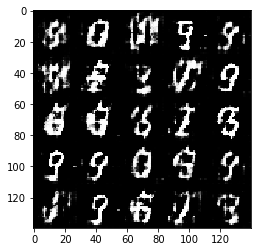

Epoch 1/2... Discriminator Loss: 0.7240... Generator Loss: 1.0934
Epoch 1/2... Discriminator Loss: 0.9930... Generator Loss: 1.0112
Epoch 1/2... Discriminator Loss: 0.6524... Generator Loss: 2.8843
Epoch 1/2... Discriminator Loss: 0.7561... Generator Loss: 1.9685
Epoch 1/2... Discriminator Loss: 0.4083... Generator Loss: 2.0755
Epoch 1/2... Discriminator Loss: 0.6245... Generator Loss: 1.5642
Epoch 1/2... Discriminator Loss: 0.7610... Generator Loss: 1.7192
Epoch 1/2... Discriminator Loss: 0.6175... Generator Loss: 1.5177
Epoch 1/2... Discriminator Loss: 0.6669... Generator Loss: 1.6463
Epoch 1/2... Discriminator Loss: 1.0748... Generator Loss: 0.8053


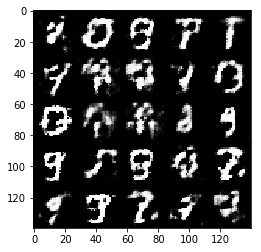

Epoch 1/2... Discriminator Loss: 0.9013... Generator Loss: 1.0662
Epoch 1/2... Discriminator Loss: 0.8758... Generator Loss: 2.1480
Epoch 1/2... Discriminator Loss: 0.9909... Generator Loss: 2.7068
Epoch 1/2... Discriminator Loss: 1.2901... Generator Loss: 0.5461
Epoch 1/2... Discriminator Loss: 1.1078... Generator Loss: 0.7811
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 0.7124
Epoch 1/2... Discriminator Loss: 1.3069... Generator Loss: 0.6981
Epoch 1/2... Discriminator Loss: 0.8151... Generator Loss: 1.8024
Epoch 1/2... Discriminator Loss: 0.9604... Generator Loss: 2.6796
Epoch 1/2... Discriminator Loss: 0.7775... Generator Loss: 1.6296


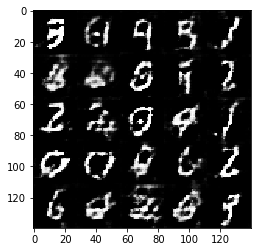

Epoch 1/2... Discriminator Loss: 2.0218... Generator Loss: 3.7998
Epoch 1/2... Discriminator Loss: 0.6670... Generator Loss: 1.9778
Epoch 1/2... Discriminator Loss: 0.7229... Generator Loss: 2.2921
Epoch 1/2... Discriminator Loss: 0.6042... Generator Loss: 2.3285
Epoch 1/2... Discriminator Loss: 1.1571... Generator Loss: 0.5551
Epoch 1/2... Discriminator Loss: 0.9065... Generator Loss: 0.8877
Epoch 1/2... Discriminator Loss: 1.5081... Generator Loss: 0.4305
Epoch 1/2... Discriminator Loss: 1.2080... Generator Loss: 0.6494
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 1.1186
Epoch 1/2... Discriminator Loss: 2.0132... Generator Loss: 4.2039


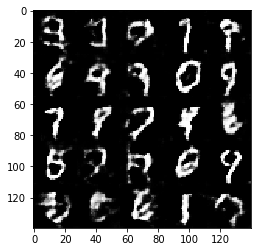

Epoch 1/2... Discriminator Loss: 1.1486... Generator Loss: 0.8355
Epoch 1/2... Discriminator Loss: 0.8361... Generator Loss: 1.1423
Epoch 1/2... Discriminator Loss: 0.8979... Generator Loss: 2.5220
Epoch 1/2... Discriminator Loss: 0.8427... Generator Loss: 2.2434
Epoch 1/2... Discriminator Loss: 0.8092... Generator Loss: 1.4307
Epoch 1/2... Discriminator Loss: 0.6800... Generator Loss: 2.3654
Epoch 1/2... Discriminator Loss: 0.6339... Generator Loss: 1.3446
Epoch 1/2... Discriminator Loss: 0.7988... Generator Loss: 1.7080
Epoch 1/2... Discriminator Loss: 0.9776... Generator Loss: 0.6983
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 0.6280


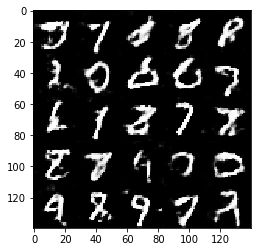

Epoch 1/2... Discriminator Loss: 0.7485... Generator Loss: 1.3559
Epoch 1/2... Discriminator Loss: 0.9859... Generator Loss: 1.1337
Epoch 1/2... Discriminator Loss: 1.2408... Generator Loss: 0.5046
Epoch 1/2... Discriminator Loss: 0.5470... Generator Loss: 1.5680
Epoch 1/2... Discriminator Loss: 0.6653... Generator Loss: 2.0597
Epoch 1/2... Discriminator Loss: 2.4508... Generator Loss: 0.2701
Epoch 1/2... Discriminator Loss: 1.1694... Generator Loss: 1.4422
Epoch 1/2... Discriminator Loss: 0.6581... Generator Loss: 1.0577
Epoch 1/2... Discriminator Loss: 0.7405... Generator Loss: 2.7344
Epoch 1/2... Discriminator Loss: 0.9278... Generator Loss: 1.1100


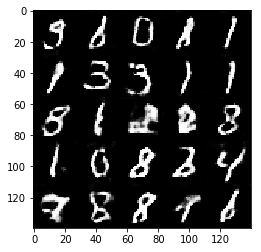

Epoch 1/2... Discriminator Loss: 0.9859... Generator Loss: 0.8429
Epoch 1/2... Discriminator Loss: 0.9760... Generator Loss: 1.5450
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 0.8012
Epoch 2/2... Discriminator Loss: 0.9008... Generator Loss: 0.9482
Epoch 2/2... Discriminator Loss: 0.9325... Generator Loss: 1.1582
Epoch 2/2... Discriminator Loss: 0.6982... Generator Loss: 1.2883
Epoch 2/2... Discriminator Loss: 0.9650... Generator Loss: 1.7846
Epoch 2/2... Discriminator Loss: 0.7865... Generator Loss: 1.2123
Epoch 2/2... Discriminator Loss: 1.0452... Generator Loss: 0.8568
Epoch 2/2... Discriminator Loss: 0.9804... Generator Loss: 0.7509


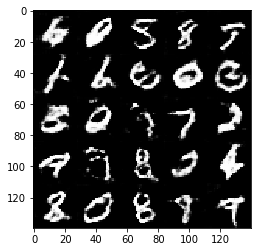

Epoch 2/2... Discriminator Loss: 0.8680... Generator Loss: 1.6637
Epoch 2/2... Discriminator Loss: 0.8030... Generator Loss: 1.7875
Epoch 2/2... Discriminator Loss: 0.6094... Generator Loss: 1.3452
Epoch 2/2... Discriminator Loss: 0.9221... Generator Loss: 0.9730
Epoch 2/2... Discriminator Loss: 1.4036... Generator Loss: 0.3964
Epoch 2/2... Discriminator Loss: 0.9891... Generator Loss: 0.9241
Epoch 2/2... Discriminator Loss: 0.7375... Generator Loss: 1.5722
Epoch 2/2... Discriminator Loss: 1.6340... Generator Loss: 0.3346
Epoch 2/2... Discriminator Loss: 0.7650... Generator Loss: 1.1666
Epoch 2/2... Discriminator Loss: 0.6478... Generator Loss: 1.2358


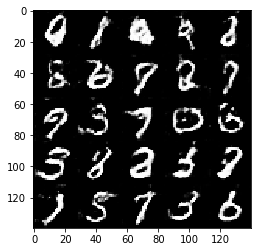

Epoch 2/2... Discriminator Loss: 0.6644... Generator Loss: 1.5622
Epoch 2/2... Discriminator Loss: 0.8711... Generator Loss: 1.6865
Epoch 2/2... Discriminator Loss: 0.6368... Generator Loss: 2.1922
Epoch 2/2... Discriminator Loss: 0.7224... Generator Loss: 1.6070
Epoch 2/2... Discriminator Loss: 1.1499... Generator Loss: 2.2301
Epoch 2/2... Discriminator Loss: 0.9040... Generator Loss: 0.8520
Epoch 2/2... Discriminator Loss: 1.5379... Generator Loss: 0.3598
Epoch 2/2... Discriminator Loss: 1.4075... Generator Loss: 0.4991
Epoch 2/2... Discriminator Loss: 1.1083... Generator Loss: 0.6885
Epoch 2/2... Discriminator Loss: 1.1803... Generator Loss: 0.5509


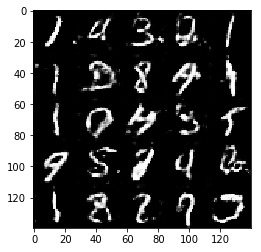

Epoch 2/2... Discriminator Loss: 1.4371... Generator Loss: 0.4325
Epoch 2/2... Discriminator Loss: 1.1097... Generator Loss: 1.7317
Epoch 2/2... Discriminator Loss: 1.0417... Generator Loss: 0.7110
Epoch 2/2... Discriminator Loss: 1.3009... Generator Loss: 0.6175
Epoch 2/2... Discriminator Loss: 1.0964... Generator Loss: 1.3554
Epoch 2/2... Discriminator Loss: 0.8519... Generator Loss: 2.1822
Epoch 2/2... Discriminator Loss: 0.9481... Generator Loss: 0.8576
Epoch 2/2... Discriminator Loss: 0.9940... Generator Loss: 0.7743
Epoch 2/2... Discriminator Loss: 0.5637... Generator Loss: 1.9464
Epoch 2/2... Discriminator Loss: 0.7716... Generator Loss: 1.7500


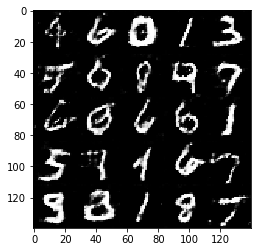

Epoch 2/2... Discriminator Loss: 0.4995... Generator Loss: 1.4807
Epoch 2/2... Discriminator Loss: 1.7739... Generator Loss: 0.3742
Epoch 2/2... Discriminator Loss: 1.0916... Generator Loss: 0.5920
Epoch 2/2... Discriminator Loss: 1.0455... Generator Loss: 0.8200
Epoch 2/2... Discriminator Loss: 1.4611... Generator Loss: 0.5269
Epoch 2/2... Discriminator Loss: 1.2569... Generator Loss: 1.5264
Epoch 2/2... Discriminator Loss: 0.7579... Generator Loss: 1.1694
Epoch 2/2... Discriminator Loss: 0.9609... Generator Loss: 0.7057
Epoch 2/2... Discriminator Loss: 0.8219... Generator Loss: 1.4539
Epoch 2/2... Discriminator Loss: 0.9418... Generator Loss: 1.2236


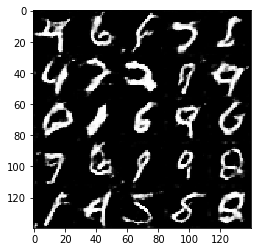

Epoch 2/2... Discriminator Loss: 1.1458... Generator Loss: 0.5996
Epoch 2/2... Discriminator Loss: 1.1173... Generator Loss: 0.6660
Epoch 2/2... Discriminator Loss: 1.3030... Generator Loss: 0.6663
Epoch 2/2... Discriminator Loss: 0.6106... Generator Loss: 1.3325
Epoch 2/2... Discriminator Loss: 1.0205... Generator Loss: 0.7739
Epoch 2/2... Discriminator Loss: 0.9869... Generator Loss: 1.0976
Epoch 2/2... Discriminator Loss: 1.2335... Generator Loss: 1.2448
Epoch 2/2... Discriminator Loss: 1.3468... Generator Loss: 0.5249
Epoch 2/2... Discriminator Loss: 1.4817... Generator Loss: 0.4330
Epoch 2/2... Discriminator Loss: 1.0092... Generator Loss: 0.8666


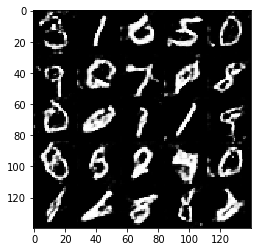

Epoch 2/2... Discriminator Loss: 0.6469... Generator Loss: 2.0499
Epoch 2/2... Discriminator Loss: 0.8137... Generator Loss: 1.0586
Epoch 2/2... Discriminator Loss: 0.4399... Generator Loss: 2.0379
Epoch 2/2... Discriminator Loss: 0.7870... Generator Loss: 1.0958
Epoch 2/2... Discriminator Loss: 1.4652... Generator Loss: 0.3675
Epoch 2/2... Discriminator Loss: 1.7020... Generator Loss: 0.5192
Epoch 2/2... Discriminator Loss: 1.2657... Generator Loss: 0.5901
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.4924
Epoch 2/2... Discriminator Loss: 1.4860... Generator Loss: 0.4412
Epoch 2/2... Discriminator Loss: 0.9026... Generator Loss: 0.9497


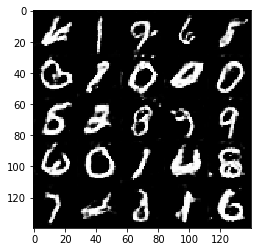

Epoch 2/2... Discriminator Loss: 1.1963... Generator Loss: 0.5843
Epoch 2/2... Discriminator Loss: 0.8961... Generator Loss: 0.9263
Epoch 2/2... Discriminator Loss: 0.8526... Generator Loss: 1.1914
Epoch 2/2... Discriminator Loss: 1.9767... Generator Loss: 0.2611
Epoch 2/2... Discriminator Loss: 0.7495... Generator Loss: 1.0820
Epoch 2/2... Discriminator Loss: 0.7681... Generator Loss: 0.9994
Epoch 2/2... Discriminator Loss: 0.5558... Generator Loss: 1.2858
Epoch 2/2... Discriminator Loss: 0.9561... Generator Loss: 0.7612
Epoch 2/2... Discriminator Loss: 0.9883... Generator Loss: 0.7203
Epoch 2/2... Discriminator Loss: 1.8056... Generator Loss: 0.2527


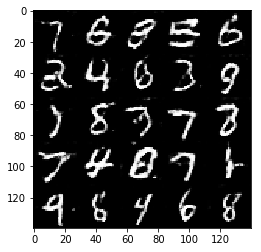

Epoch 2/2... Discriminator Loss: 1.7407... Generator Loss: 0.2900
Epoch 2/2... Discriminator Loss: 1.4408... Generator Loss: 0.4637
Epoch 2/2... Discriminator Loss: 0.9485... Generator Loss: 0.8336
Epoch 2/2... Discriminator Loss: 1.4435... Generator Loss: 0.3748
Epoch 2/2... Discriminator Loss: 0.6894... Generator Loss: 1.6567
Epoch 2/2... Discriminator Loss: 0.7272... Generator Loss: 1.2815
Epoch 2/2... Discriminator Loss: 0.6841... Generator Loss: 1.3490
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 0.8058
Epoch 2/2... Discriminator Loss: 0.7215... Generator Loss: 1.0503
Epoch 2/2... Discriminator Loss: 0.8877... Generator Loss: 1.2629


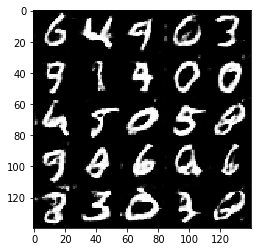

Epoch 2/2... Discriminator Loss: 1.3576... Generator Loss: 0.7624
Epoch 2/2... Discriminator Loss: 0.7751... Generator Loss: 1.0543
Epoch 2/2... Discriminator Loss: 1.1880... Generator Loss: 0.5882
Epoch 2/2... Discriminator Loss: 1.2405... Generator Loss: 1.6411
Epoch 2/2... Discriminator Loss: 0.7376... Generator Loss: 2.3784
Epoch 2/2... Discriminator Loss: 0.8067... Generator Loss: 1.3362
Epoch 2/2... Discriminator Loss: 1.1280... Generator Loss: 0.5783


In [68]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7049... Generator Loss: 4.7399
Epoch 1/1... Discriminator Loss: 0.1509... Generator Loss: 3.0776
Epoch 1/1... Discriminator Loss: 0.2208... Generator Loss: 5.9546
Epoch 1/1... Discriminator Loss: 0.1407... Generator Loss: 3.2806
Epoch 1/1... Discriminator Loss: 0.7924... Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 2.9281
Epoch 1/1... Discriminator Loss: 2.0826... Generator Loss: 0.3858
Epoch 1/1... Discriminator Loss: 0.3682... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 0.4429... Generator Loss: 1.9547
Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 2.4146


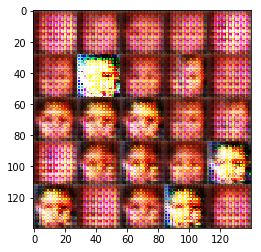

Epoch 1/1... Discriminator Loss: 0.7038... Generator Loss: 2.2104
Epoch 1/1... Discriminator Loss: 0.4463... Generator Loss: 1.2605
Epoch 1/1... Discriminator Loss: 0.7125... Generator Loss: 1.9226
Epoch 1/1... Discriminator Loss: 0.1329... Generator Loss: 2.3592
Epoch 1/1... Discriminator Loss: 0.0992... Generator Loss: 6.5257
Epoch 1/1... Discriminator Loss: 0.4267... Generator Loss: 1.2495
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 0.4156... Generator Loss: 3.6435
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 3.2663
Epoch 1/1... Discriminator Loss: 1.6723... Generator Loss: 5.4067


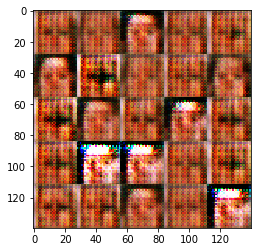

Epoch 1/1... Discriminator Loss: 0.4533... Generator Loss: 2.0526
Epoch 1/1... Discriminator Loss: 0.7716... Generator Loss: 2.9424
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 1.6065
Epoch 1/1... Discriminator Loss: 0.3875... Generator Loss: 3.0413
Epoch 1/1... Discriminator Loss: 0.3180... Generator Loss: 2.6549
Epoch 1/1... Discriminator Loss: 2.1778... Generator Loss: 2.4824
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 0.6069... Generator Loss: 1.7438
Epoch 1/1... Discriminator Loss: 1.0151... Generator Loss: 1.4617
Epoch 1/1... Discriminator Loss: 0.5006... Generator Loss: 1.5540


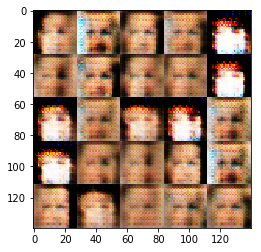

Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 1.2530
Epoch 1/1... Discriminator Loss: 0.3876... Generator Loss: 2.0195
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 2.5315
Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 1.2410
Epoch 1/1... Discriminator Loss: 1.1202... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 0.1479... Generator Loss: 3.3296
Epoch 1/1... Discriminator Loss: 0.9196... Generator Loss: 1.9511
Epoch 1/1... Discriminator Loss: 1.2420... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 0.5419... Generator Loss: 2.6721


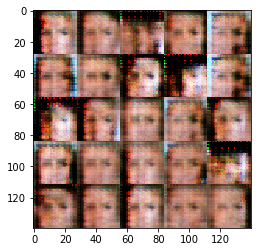

Epoch 1/1... Discriminator Loss: 0.5834... Generator Loss: 1.6028
Epoch 1/1... Discriminator Loss: 1.8769... Generator Loss: 1.6436
Epoch 1/1... Discriminator Loss: 0.8149... Generator Loss: 0.9108
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 0.7913... Generator Loss: 1.1444
Epoch 1/1... Discriminator Loss: 0.7132... Generator Loss: 1.2162
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.8721
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 0.6377... Generator Loss: 1.6010


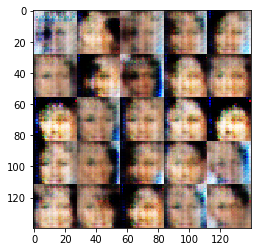

Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 1.9721
Epoch 1/1... Discriminator Loss: 1.1112... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 3.2608... Generator Loss: 0.0478
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.8659
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.9135


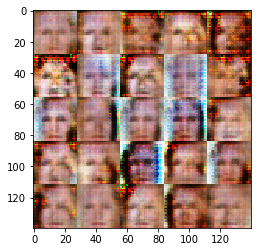

Epoch 1/1... Discriminator Loss: 0.7367... Generator Loss: 1.5850
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 1.6280
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 1.2290
Epoch 1/1... Discriminator Loss: 0.6081... Generator Loss: 1.5436
Epoch 1/1... Discriminator Loss: 0.4335... Generator Loss: 1.4517
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.8987... Generator Loss: 3.0436
Epoch 1/1... Discriminator Loss: 1.1439... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.0580... Generator Loss: 2.1302
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 1.5741


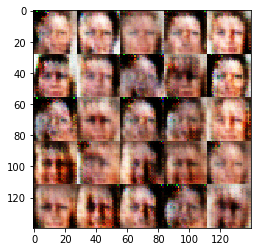

Epoch 1/1... Discriminator Loss: 0.9232... Generator Loss: 1.1559
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 0.8471
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 0.9394
Epoch 1/1... Discriminator Loss: 2.0004... Generator Loss: 3.3754
Epoch 1/1... Discriminator Loss: 1.6878... Generator Loss: 0.2555
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 2.2201
Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 2.3260
Epoch 1/1... Discriminator Loss: 0.7204... Generator Loss: 1.0309
Epoch 1/1... Discriminator Loss: 2.5700... Generator Loss: 3.1366


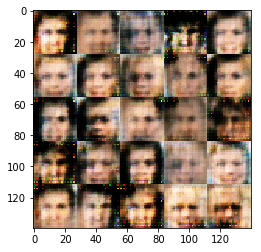

Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 0.9392
Epoch 1/1... Discriminator Loss: 1.2621... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 1.4657
Epoch 1/1... Discriminator Loss: 1.0246... Generator Loss: 1.4017
Epoch 1/1... Discriminator Loss: 0.9924... Generator Loss: 0.9061
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 1.1866
Epoch 1/1... Discriminator Loss: 0.8450... Generator Loss: 1.5732
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.3134
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 0.6843


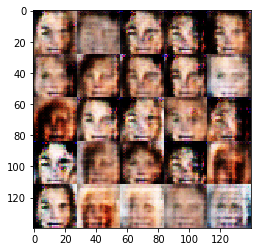

Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 1.1469
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.4968
Epoch 1/1... Discriminator Loss: 1.8935... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 1.3102... Generator Loss: 0.8417
Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.7602
Epoch 1/1... Discriminator Loss: 0.8959... Generator Loss: 0.9605
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.0834... Generator Loss: 1.1009
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 1.3780


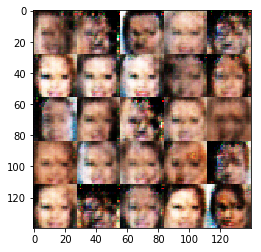

Epoch 1/1... Discriminator Loss: 0.5461... Generator Loss: 1.6472
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 0.9536... Generator Loss: 1.5826
Epoch 1/1... Discriminator Loss: 1.7302... Generator Loss: 0.3008
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 2.0499... Generator Loss: 0.2319
Epoch 1/1... Discriminator Loss: 1.0081... Generator Loss: 1.5195
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.5651


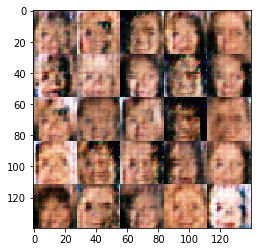

Epoch 1/1... Discriminator Loss: 0.8872... Generator Loss: 1.1463
Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 0.5588... Generator Loss: 1.4969
Epoch 1/1... Discriminator Loss: 2.6934... Generator Loss: 3.2359
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 1.1524
Epoch 1/1... Discriminator Loss: 0.2586... Generator Loss: 1.9750
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 0.8902
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 1.3226
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 0.9854... Generator Loss: 0.8799


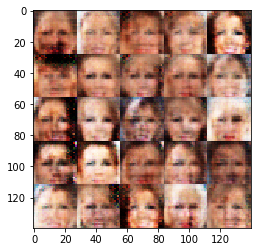

Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 2.3013
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 0.5120
Epoch 1/1... Discriminator Loss: 1.4792... Generator Loss: 0.4189
Epoch 1/1... Discriminator Loss: 1.0465... Generator Loss: 0.9070
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 0.7422... Generator Loss: 1.1833
Epoch 1/1... Discriminator Loss: 0.7819... Generator Loss: 1.4293
Epoch 1/1... Discriminator Loss: 0.6133... Generator Loss: 1.0614


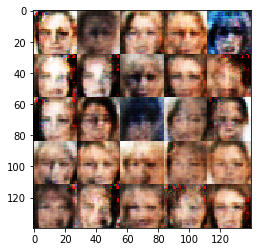

Epoch 1/1... Discriminator Loss: 2.5772... Generator Loss: 3.7547
Epoch 1/1... Discriminator Loss: 0.7546... Generator Loss: 1.4482
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 2.0413
Epoch 1/1... Discriminator Loss: 1.9690... Generator Loss: 2.8853
Epoch 1/1... Discriminator Loss: 0.8020... Generator Loss: 1.4329
Epoch 1/1... Discriminator Loss: 1.9950... Generator Loss: 3.3542
Epoch 1/1... Discriminator Loss: 0.7577... Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 2.2279... Generator Loss: 0.2120
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.5720
Epoch 1/1... Discriminator Loss: 0.9772... Generator Loss: 1.0451


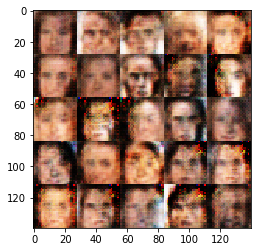

Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 2.0589
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 1.0058
Epoch 1/1... Discriminator Loss: 1.1974... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 0.5366... Generator Loss: 1.4582
Epoch 1/1... Discriminator Loss: 0.4852... Generator Loss: 1.8497
Epoch 1/1... Discriminator Loss: 0.8485... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 1.9583
Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 1.4264
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 1.2283


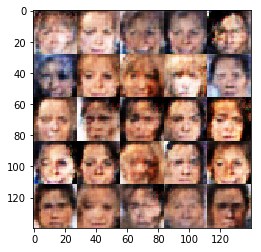

Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 0.8806... Generator Loss: 1.1268
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 1.2452
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 1.5749
Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 1.5633
Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 0.9793
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 1.3087


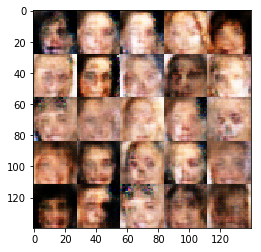

Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 1.0866
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 1.0687
Epoch 1/1... Discriminator Loss: 1.1300... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.4751... Generator Loss: 0.5685
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 0.8545
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 1.7171
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.4215
Epoch 1/1... Discriminator Loss: 0.1639... Generator Loss: 2.8415
Epoch 1/1... Discriminator Loss: 0.9412... Generator Loss: 0.9601
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.7247


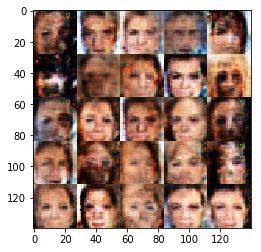

Epoch 1/1... Discriminator Loss: 0.9108... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 2.3650
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 0.9320
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 2.5803
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.5020
Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 0.7666
Epoch 1/1... Discriminator Loss: 0.9796... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 2.3370... Generator Loss: 0.1612


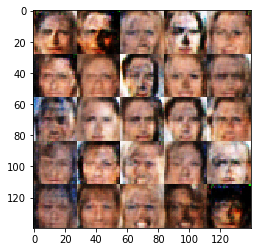

Epoch 1/1... Discriminator Loss: 1.0159... Generator Loss: 1.2194
Epoch 1/1... Discriminator Loss: 1.0081... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 0.7775... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 1.0113... Generator Loss: 0.8779
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 1.2469
Epoch 1/1... Discriminator Loss: 1.6065... Generator Loss: 0.4839
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.7305
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.2420... Generator Loss: 1.1218
Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.6388


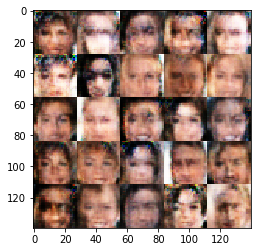

Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 1.0033
Epoch 1/1... Discriminator Loss: 1.0740... Generator Loss: 0.6487
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 1.0196... Generator Loss: 0.9846
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 1.4021
Epoch 1/1... Discriminator Loss: 0.9672... Generator Loss: 0.8735
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 1.3157
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 1.1323


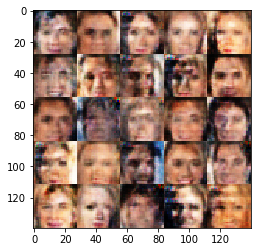

Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 0.9368
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 2.9823
Epoch 1/1... Discriminator Loss: 2.1689... Generator Loss: 0.2028
Epoch 1/1... Discriminator Loss: 1.7931... Generator Loss: 2.6843
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 1.2383
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 1.0357
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.2141
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 1.8548
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 0.7094


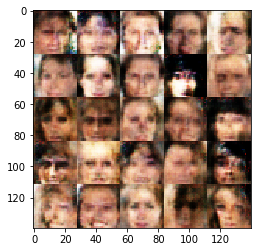

Epoch 1/1... Discriminator Loss: 1.0731... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.5020
Epoch 1/1... Discriminator Loss: 0.4442... Generator Loss: 1.7452
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 1.0661
Epoch 1/1... Discriminator Loss: 1.5810... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.7438... Generator Loss: 2.3045
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.5231
Epoch 1/1... Discriminator Loss: 0.6083... Generator Loss: 1.5029
Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 1.2619


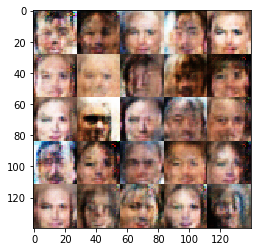

Epoch 1/1... Discriminator Loss: 0.4050... Generator Loss: 1.7320
Epoch 1/1... Discriminator Loss: 2.5688... Generator Loss: 2.8995
Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 1.0204
Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 1.0384
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 1.8200
Epoch 1/1... Discriminator Loss: 0.8771... Generator Loss: 1.1530
Epoch 1/1... Discriminator Loss: 0.9047... Generator Loss: 0.8606
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 0.8362
Epoch 1/1... Discriminator Loss: 0.9417... Generator Loss: 1.2377
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.4820


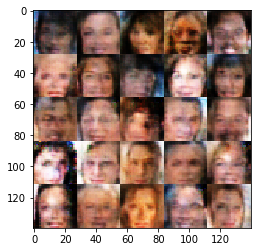

Epoch 1/1... Discriminator Loss: 1.8537... Generator Loss: 2.0571
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 0.9644
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.5327
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 1.4183
Epoch 1/1... Discriminator Loss: 0.9136... Generator Loss: 0.9379
Epoch 1/1... Discriminator Loss: 0.6723... Generator Loss: 1.3330
Epoch 1/1... Discriminator Loss: 0.2730... Generator Loss: 2.0726
Epoch 1/1... Discriminator Loss: 1.2984... Generator Loss: 0.4775
Epoch 1/1... Discriminator Loss: 0.9215... Generator Loss: 3.1510


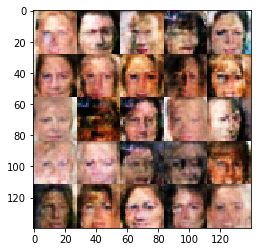

Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.5046
Epoch 1/1... Discriminator Loss: 1.0755... Generator Loss: 1.2419
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 0.8615... Generator Loss: 1.3640
Epoch 1/1... Discriminator Loss: 0.8967... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 0.9450... Generator Loss: 1.0289
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 1.1154
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.7266


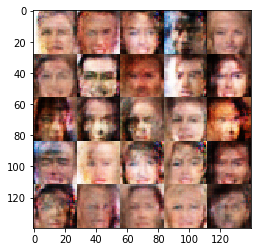

Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 1.1331
Epoch 1/1... Discriminator Loss: 1.5804... Generator Loss: 0.3438
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.5142
Epoch 1/1... Discriminator Loss: 0.8369... Generator Loss: 1.0427
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.8859
Epoch 1/1... Discriminator Loss: 1.1148... Generator Loss: 0.7597
Epoch 1/1... Discriminator Loss: 1.0135... Generator Loss: 1.1961
Epoch 1/1... Discriminator Loss: 0.5153... Generator Loss: 1.3174
Epoch 1/1... Discriminator Loss: 0.6678... Generator Loss: 1.2543
Epoch 1/1... Discriminator Loss: 1.0480... Generator Loss: 0.7670


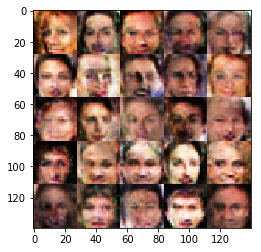

Epoch 1/1... Discriminator Loss: 0.3065... Generator Loss: 2.1741
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 1.0234
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.8937
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.5404
Epoch 1/1... Discriminator Loss: 0.9161... Generator Loss: 1.3062
Epoch 1/1... Discriminator Loss: 1.2424... Generator Loss: 1.1152
Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 0.5810
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.9021
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.7072


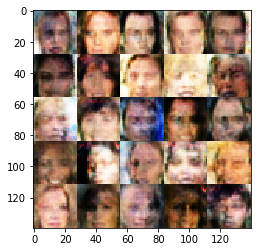

Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 1.4334
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.8438
Epoch 1/1... Discriminator Loss: 1.1504... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.8863
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7596
Epoch 1/1... Discriminator Loss: 1.2051... Generator Loss: 1.8237
Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.5243
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 1.9696
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 0.8287


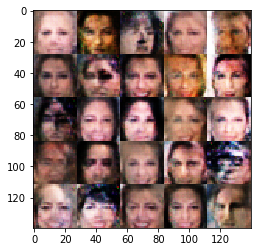

Epoch 1/1... Discriminator Loss: 1.0589... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.9652
Epoch 1/1... Discriminator Loss: 1.0667... Generator Loss: 0.8907
Epoch 1/1... Discriminator Loss: 1.0794... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 0.9868... Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 0.8870... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 0.9539... Generator Loss: 1.2514
Epoch 1/1... Discriminator Loss: 1.0584... Generator Loss: 1.1487
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 1.2180
Epoch 1/1... Discriminator Loss: 0.7409... Generator Loss: 0.8973


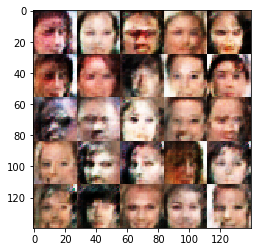

Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 0.7024
Epoch 1/1... Discriminator Loss: 1.0864... Generator Loss: 1.6197
Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 2.5387
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 0.9544
Epoch 1/1... Discriminator Loss: 2.0280... Generator Loss: 2.7723
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.6900... Generator Loss: 0.3643
Epoch 1/1... Discriminator Loss: 1.2698... Generator Loss: 0.4797


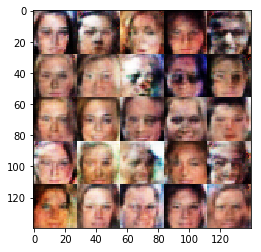

Epoch 1/1... Discriminator Loss: 0.9194... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 1.1423... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.0842... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.7959... Generator Loss: 1.3438
Epoch 1/1... Discriminator Loss: 0.9289... Generator Loss: 1.5147
Epoch 1/1... Discriminator Loss: 1.0118... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 0.9930
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.2710
Epoch 1/1... Discriminator Loss: 0.9302... Generator Loss: 1.0497
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.5521


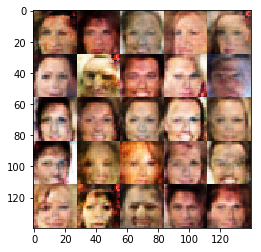

Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 0.8727
Epoch 1/1... Discriminator Loss: 0.9169... Generator Loss: 1.1170
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.5336


In [69]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.